In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split

# Data Analysis (nans and duplicates and ...)

In [16]:
df = pd.read_csv("data/ratings.csv")
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [17]:
matrix = df.pivot(index='movieId', columns='userId', values='rating')

# Drop rows and columns where all values are NaN
matrix = matrix.dropna(axis=1, how='all')
matrix = matrix.dropna(axis=0, how='all')

In [18]:
matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Count missing values
na_count = matrix.isna().sum().sum()

# Total number of cells
total_cells = matrix.size

# Proportion of missing values
na_proportion = na_count / total_cells

print(f"Count of NaN: {na_count}")
print(f"Total cells: {total_cells}")
print(f"Proportion of NaN: {na_proportion:.2f}")

Count of NaN: 5830804
Total cells: 5931640
Proportion of NaN: 0.98


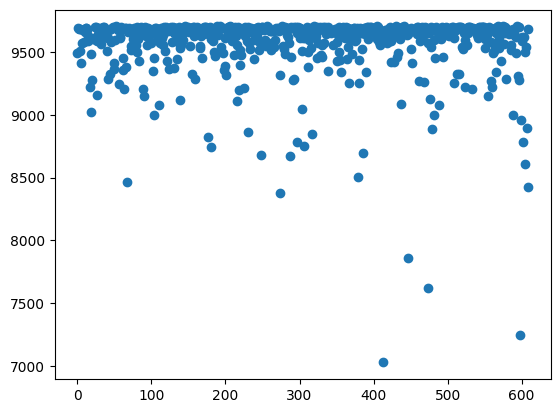

In [20]:
na_per_col = matrix.isna().sum(axis=0)
plt.scatter(range(len(na_per_col)), na_per_col) # qnt mais elevado, mais nan tem

In [21]:
# Filter columns with <= max_nans NaNs
filter_matrix = matrix.loc[:, matrix.isna().sum(axis=0) <= 9724 - 50]

# Drop rows and columns where all values are NaN
filter_matrix = filter_matrix.dropna(axis=1, how='all')
filter_matrix = filter_matrix.dropna(axis=0, how='all')

In [22]:
# Count missing values
na_count = filter_matrix.isna().sum().sum()

# Total number of cells
total_cells = filter_matrix.size

# Proportion of missing values
na_proportion = na_count / total_cells

print(f"Count of NaN: {na_count}")
print(f"Total cells: {total_cells}")
print(f"Proportion of NaN: {na_proportion:.2f}")
print(f"Number of non Nan cells: {total_cells - na_count}")

Count of NaN: 3614893
Total cells: 3708705
Proportion of NaN: 0.97
Number of non Nan cells: 93812


In [23]:
print(filter_matrix.shape)
filter_matrix.iloc[:5, :5]

(9633, 385)


userId,1,4,6,7,10
movieId,,,,,
1,4.0,NaN,NaN,4.5,NaN
2,NaN,NaN,4.0,NaN,NaN
3,4.0,NaN,5.0,NaN,NaN
4,NaN,NaN,3.0,NaN,NaN
5,NaN,NaN,5.0,NaN,NaN


In [24]:
value_counts = df['userId'].value_counts()
df_filtered = df[df['userId'].isin(value_counts[value_counts >= 50].index)]
df_filtered = df_filtered.drop('timestamp', axis=1)

df_filtered

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


# Saving files

save all ratings in a file called `ratings.csv`

In [25]:
df_filtered.to_csv("data/data.csv", index=False)

save all movies and users ids encoded in a file called `data_ids.json`

In [26]:
moviesIDs = {int(number): index for index, number in enumerate(sorted(df_filtered['movieId'].unique()))}
userIDs = {int(number): index for index, number in enumerate(sorted(df_filtered['userId'].unique()))}

ids = {"moviesIDs": moviesIDs, "userIDs": userIDs}

with open("data/data_ids.json", 'w') as file:
    json.dump(ids, file, indent=4)

split the data into training and testing sets and save them in files called `data_train.csv` and `data_test.csv`

In [27]:
df_80, df_20 = train_test_split(df_filtered, test_size=0.2, random_state=42)

#print(set(df_20["userId"]).issubset(set(df_80["userId"])))
#print(set(df_20["movieId"]).issubset(set(df_80["movieId"])))

df_80.to_csv("data/data_train.csv", index=False)
df_20.to_csv("data/data_test.csv", index=False)

read the data from the files to make sure that everything is saved correctly

In [28]:
#pd.read_csv("data/data.csv")

#with open("data/data_ids.json") as f:
#    ids = json.load(f)
#ids.keys()

df_80 = pd.read_csv("data/data_train.csv")
df_20 = pd.read_csv("data/data_test.csv")
print(df_80.shape, df_20.shape) # qnt de ratings
print(df_80['userId'].nunique(), df_20['userId'].nunique()) # qnt de users
print(df_80['movieId'].nunique(), df_20['movieId'].nunique()) # qnt de filmes

(75049, 3) (18763, 3)
385 385
8921 4988
